<h1>Exploration of a Spring Pendulum</h1>
<h2>Sample Project</h2>
<h2>PHY 2200 - Spring 2023</h2>

### Introduction and overview

The spring pendulum (aka, "elastic pendulum," or "swing spring") is a fairly simple mechanical system which can give rise to surprisingly complicated behavior. The object consists of a mass $m$ attached to an elastic band with equilibrium length $\ell_{0}$ and spring constant $k$. One end of the band is fixed to point (the "ceiling") that we take to be the origin. Taking $(x,y,z)$ to be the location of the mass, the three, second-order equations of motion for this system [are](http://depts.washington.edu/amath/wordpress/wp-content/uploads/2014/01/leah_ganis_pres.pdf):

$$\frac{d^{2}x}{dt^{2}} = -\frac{k}{m}\left(\frac{\ell - \ell_{0}}{\ell}\right)x$$
$$\frac{d^{2}y}{dt^{2}} = -\frac{k}{m}\left(\frac{\ell - \ell_{0}}{\ell}\right)y$$
$$\frac{d^{2}z}{dt^{2}} = -\frac{k}{m}\left(\frac{\ell - \ell_{0}}{\ell}\right)z - g$$

Here $g = 9.8\mbox{ m/s}^{2}$ is gravitational acceleration, and the quantity $\ell$ is the instantaneous length of the stretchable band

$$\ell = \sqrt{x^{2} + y^{2} +z^{2}}$$

The system exhibits and interesting "mode switching" behavior when the ration of the two oscillation frequencies, $\omega_{r} = \sqrt{g/l}$ and $\omega_{z} = \sqrt{k/m}$, is a rational number. The mass switches between a simple, swinging motion (like a pendulum swinging back and forth) and a "springing" motion (bobbing vertically). Each time the swinging mode resumes, the plane of motion is rotated by some fixed angle $\Delta \phi$.

The goal of this project is to integrate the equations of motion numerically and confirm the precession of the swinging plane at the resonance $\nu = \omega_{z}/\omega_{r} = 2$. Once the basic behavior is uncovered, we will explore how the dynamics change when $\nu$ is allowed to take other rational values.

The strategy will be to rewrite the system above as six first-order equations and use the `scipy` routine `odeint()` to perform the numerical integration.

### Calculation

In [43]:
import numpy as np
from matplotlib import pyplot as plt

By trial and error, I have settled on $t_{max} = 200$ s as giving enough time to see the desired phenomena. The choice `N = 20000` gives one hundred steps per second. The results are insensitive to raising or lowering this number slightly which gives good confidence that convergence of the algorithm has been obtained.

Below are the parameter definitions and initial conditions. To initiate a swinging/springing cycle, we "lift" the pendulum in the $xz$ plane. With no initial velocity, the mass would continue swinging in this plane. A small nonzero value for $v_{y}(0)$ gives a tiny amount of angular momentum which allows the swinging plane to precess after transitioning to a transient springing phase.

The condition $\omega_{z}/\omega_{r}= \nu$ must be enforced. To this end, we take $m$, $\ell_{0}$, and $g$ fixed and work out $k$ to ensure the correct ratio.

In [44]:
N = 20000
tmax = 200
t = np.linspace(0,tmax,N)

g = 9.8
ν = 2
lo = 10

#given resonance condition ν, we fix m = 1 and select k to enforce this condition
l1 = lo/(1-ν**(-2))
m = 1
k = m*g*(ν**2)/l1

#initial conditions: 
xo = 0.5
yo = 0
zo = -lo+0.1

vxo = 0.0
vyo = 0.1
vzo = 0

Next, we define a function to return the derivatives of the system. This function will be used by `odeint()`, and we should list any parameters as inputs.

In [45]:
def swingspring(u,t,k,m,lo,g):
    x = u[0]
    y = u[1]
    z = u[2]
    vx = u[3]
    vy = u[4]
    vz = u[5]
    l = np.sqrt(x**2+y**2+z**2)
    return (vx,vy,vz,-(k/m)*(l-lo)*x/l,-(k/m)*(l-lo)*y/l,-(k/m)*(l-lo)*z/l-g)

The function `odeint()` requires importing `scipy.integrate`. It takes a derivative function, the initial conditions (stored as a vector) and a list of `args=()` which allows us to pass all parameter values.

Arrays for $x$, $y$, $z$, $v_{x}$, $v_{y}$, $v_{z}$ are returned from the function as follows.

In [46]:
x0 = np.array([xo,yo,zo,vxo,vyo,vzo])
from scipy import integrate
x,y,z,vx,vy,vz = integrate.odeint(swingspring,x0,t,args=(k,m,lo,g)).T

Now with the solution in hand, we can plot various variables to explore the dynamics.

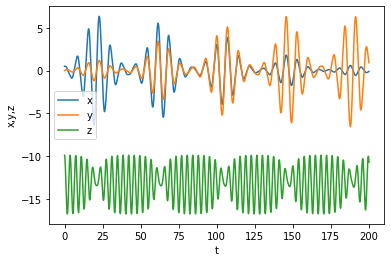

In [47]:
plt.plot(t,x)
plt.plot(t,y)
plt.plot(t,z)
plt.xlabel('t')
plt.ylabel('x,y,z')
plt.legend(['x','y','z'])
plt.show()

We see evidence of some sort of switching between $xy$ motion and $z$ motion. As the amplitude of the $z(t)$ plot increases, the $xy$-plane motion decreases. This is evidence of the mode switching. It's unclear exactly <i>what</i> is happening in the $xy$ plane. To take a closer look, we can plot projections of the phase space into the $xz$ (looking straight on) and $xy$ planes (looking down from above).

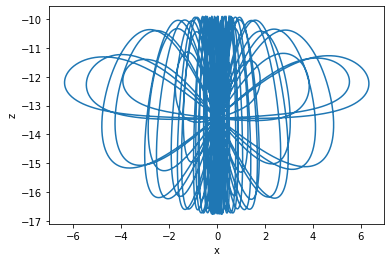

In [48]:
plt.plot(x,z)
plt.xlabel('x')
plt.ylabel('z')
plt.show()

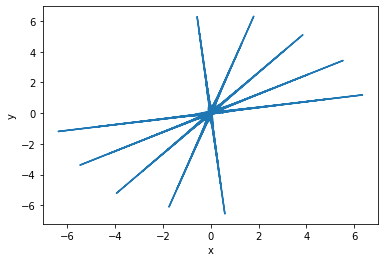

In [49]:
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

The $(x,y)$ plot confirms that the swing plane is rotating as we look down from above on the trajectory. In fact, we can make an animation to visualize the motion from both of these viewpoints:

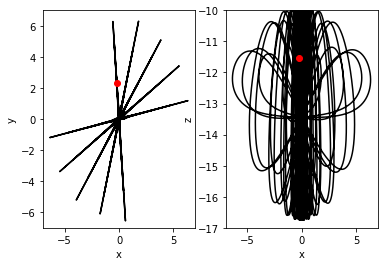

In [50]:
from time import sleep # To set the animation frame rate 
from IPython.display import clear_output # To redraw

for n in range(0,int(N/100)):
    sleep(.1) # Sets the maximum animation speed
    plt.subplot(1,2,1)
    plt.plot(x[0:100*n],y[0:100*n],'k-')
    plt.plot(x[100*n],y[100*n],'ro')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim(-7,7)
    plt.ylim(-7,7)
    
    plt.subplot(1,2,2)
    plt.plot(x[0:100*n],z[0:100*n],'k-')
    plt.plot(x[100*n],z[100*n],'ro')
    plt.xlabel('x')
    plt.ylabel('z')
    plt.xlim(-7,7)
    plt.ylim(-17,-10)
    
    clear_output(wait=True)
    plt.show()


### Reflections

Changing the number of integration steps has already been noted to have little visual effect on the solutions. Another test to build confidence in the results is to compute the total energy as a function of time.

$$E = \frac{1}{2}m\left(v_{x}^{2} + v_{y}^{2} + v_{z}^{2}\right) + mgz + \frac{1}{2}k(\ell-\ell_{0})^{2}$$

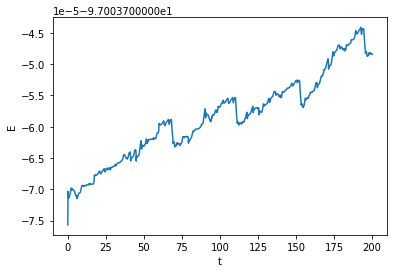

In [38]:
l = np.sqrt(x**2 + y**2 + z**2)
E = 0.5*m*(vx**2 + vy**2 + vz**2) + m*g*z + 0.5*k*(lo-l)**2

plt.plot(t,E)
plt.xlabel('t')
plt.ylabel('E')
plt.show()

The scale shows that the fluctuations in energy are of order $10^{-4}$ on top of a value of roughly $10^{2}$ (units are joules). Taking the largest spread as a fraction of the total energy gives

In [172]:
(max(E)-min(E))/max(E)

-9.264341657438435e-10

That is, energy is conserved during the calculation to within $10^{-7}$%. We thus have high confidence in the accuracy of the computation.

As another exploration, we can see how the value of $\nu$ affects the angle of the swinging plane precesses after each cycle. Let us repeat the computation for $\nu = 4$. 

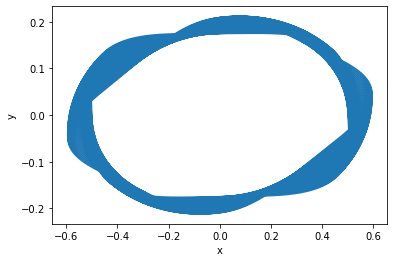

In [53]:
N = 20000
tmax = 200
t = np.linspace(0,tmax,N)

g = 9.8
ν = 4
lo = 10

#given resonance condition ν, we fix m = 1 and select k to enforce this condition
l1 = lo/(1-ν**(-2))
m = 1
k = m*g*(ν**2)/l1

#initial conditions: 
xo = 0.5
yo = 0
zo = -lo+0.1

vxo = 0.0
vyo = 0.2
vzo = 0

x0 = np.array([xo,yo,zo,vxo,vyo,vzo])
x,y,z,vx,vy,vz = integrate.odeint(swingspring,x0,t,args=(k,m,lo,g)).T

plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

For $\nu \neq 2$, the mode-switching behavior actually disappears. We can instead try changing system parameters like $k$. For example, with $\ell_{0} = 13\mbox{ m}$, we find a larger precession angle.

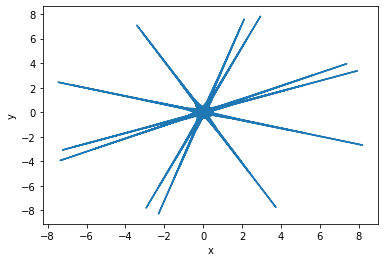

In [57]:
N = 30000
tmax = 300
t = np.linspace(0,tmax,N)

g = 9.8
ν = 2
lo = 13

#given resonance condition ν, we fix m = 1 and select k to enforce this condition
l1 = lo/(1-ν**(-2))
m = 1
k = m*g*(ν**2)/l1

#initial conditions: 
xo = 0.5
yo = 0
zo = -lo+0.1

vxo = 0.0
vyo = 0.2
vzo = 0

x0 = np.array([xo,yo,zo,vxo,vyo,vzo])
x,y,z,vx,vy,vz = integrate.odeint(swingspring,x0,t,args=(k,m,lo,g)).T

plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

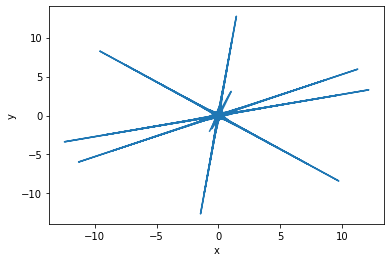

In [60]:
N = 30000
tmax = 300
t = np.linspace(0,tmax,N)

g = 9.8
ν = 2
lo = 20

#given resonance condition ν, we fix m = 1 and select k to enforce this condition
l1 = lo/(1-ν**(-2))
m = 1
k = m*g*(ν**2)/l1

#initial conditions: 
xo = 0.5
yo = 0
zo = -lo+0.1

vxo = 0.0
vyo = 0.2
vzo = 0

x0 = np.array([xo,yo,zo,vxo,vyo,vzo])
x,y,z,vx,vy,vz = integrate.odeint(swingspring,x0,t,args=(k,m,lo,g)).T

plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()